# Customer Service Requests Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/had-clu/Desktop/Data Science with Python Two/311_Service_Requests_from_2010_to_Present.csv")

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.shape

(300698, 53)

In [5]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
#checking for null values
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [8]:
#Cleaning the Dataset, Removing the columns from the data set which have less contribution in our data
#Data Cleaning
df = df.drop('School Region',axis = 1)
df = df.drop('School Code',axis = 1)
df = df.drop('School State',axis = 1)
df = df.drop('School Zip',axis = 1)
df = df.drop('School Not Found',axis = 1)
df = df.drop('School or Citywide Complaint',axis = 1)
df = df.drop('Taxi Company Borough',axis = 1)
df = df.drop('Taxi Pick Up Location',axis = 1)
df = df.drop('Garage Lot Name',axis = 1)
df = df.drop('Latitude',axis = 1)
df = df.drop('Longitude',axis = 1)
df = df.drop('Location',axis = 1)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,Vehicle Type,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Finding out the current data type of the columns
df[['Created Date','Closed Date']].dtypes

Created Date    object
Closed Date     object
dtype: object

In [10]:
#Reading the columns ‘Created Date’ and Closed Date’
df[['Created Date','Closed Date']].head()

,Created Date,Closed Date
0,12/31/2015 11:59:45 PM,01-01-16 0:55
1,12/31/2015 11:59:44 PM,01-01-16 1:26
2,12/31/2015 11:59:29 PM,01-01-16 4:51
3,12/31/2015 11:57:46 PM,01-01-16 7:43
4,12/31/2015 11:56:58 PM,01-01-16 3:24


In [11]:
#Changing the column value like datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [12]:
df[['Created Date','Closed Date']].dtypes

Created Date    datetime64[ns]
Closed Date     datetime64[ns]
dtype: object

In [13]:
#Creating a new Column
df['Request_Closing_Time'] = df['Created Date'] - df['Closed Date']

In [14]:
df['Request_Closing_Time'].head()

0   -1 days +23:04:45
1   -1 days +22:33:44
2   -1 days +19:08:29
3   -1 days +16:14:46
4   -1 days +20:32:58
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [15]:
df['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [16]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [17]:
df['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

### Insight1

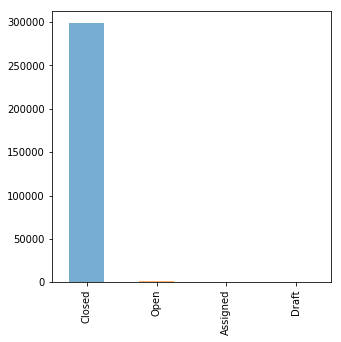

In [18]:
#Finding the status of these service requests and then plotting these service requests
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(5,5))
plt.show()

### Insight2

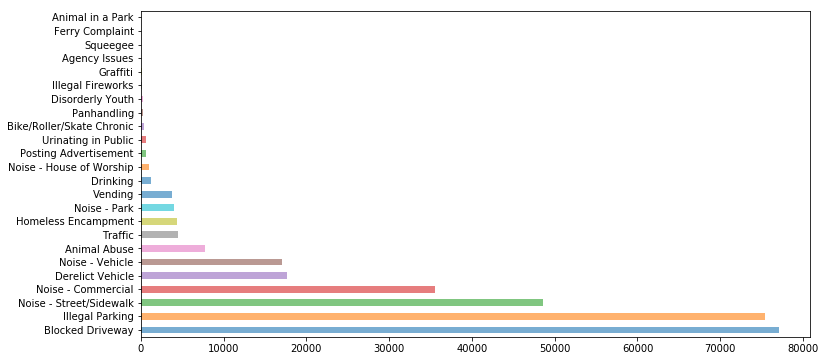

In [19]:
#finding the major Complain Types
df['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6, figsize=(12,6))
plt.show()

### Insight3

In [20]:
#Finding the City with the highest complaints according to complaint types
df['City'].value_counts()
df['Complaint Type'].value_counts()
df[['Complaint Type','City']].head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


### Insight4

In [27]:
#plotting graph for most frequent complaints in a particulat city

In [21]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [22]:
df['City'].isna().sum()

2614

In [23]:
#fix those NAN with "unknown city" value instead
df['City'].fillna('Unknown City', inplace =True)

In [24]:
df['City'].isna().sum()

0

In [25]:
df_NewYork = df[df['City']=='NEW YORK']
df_NewYork.shape

(65994, 42)

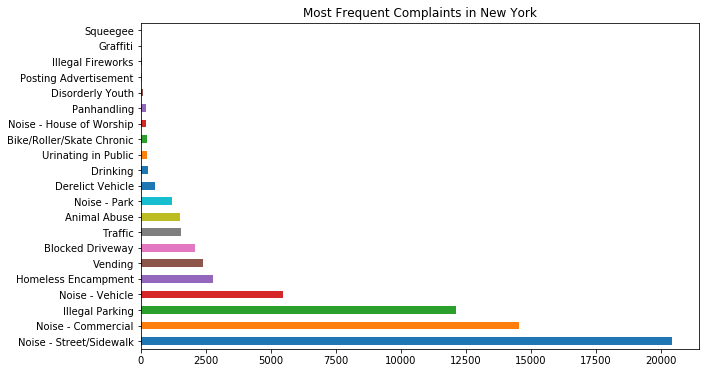

In [26]:
(df_NewYork['Complaint Type'].value_counts()).head(25).plot(kind='barh',
                              figsize=(10,6),title = 'Most Frequent Complaints in New York')

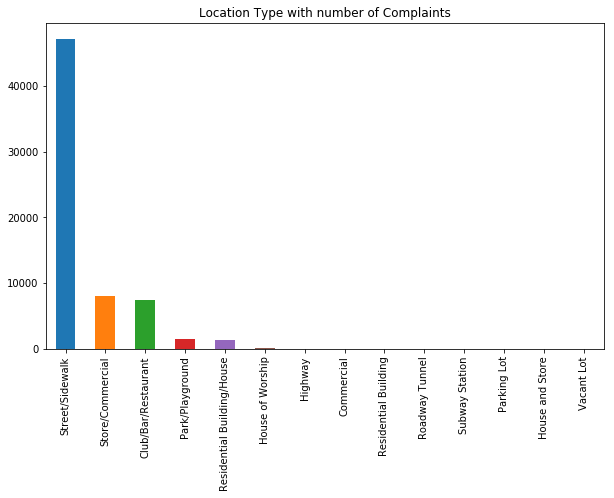

In [30]:
(df_NewYork['Location Type'].value_counts()).head(25).plot(kind='bar',
                                    figsize=(10,6),title = 'Location Type with number of Complaints')

### Order the complaint types based on the average ‘Request_Closing_Time’ grouping them for different locations.

In [32]:
#Finding the average ‘Request_Closing_Time’
Avg_Request_Closing_Time = df['Request_Closing_Time'].mean()

In [33]:
Ordered_CT = df.sort_values(by=['Complaint Type','Request_Closing_Time'],ascending='True')
Ordered_CT[['Complaint Type','Request_Closing_Time']].head()

,Complaint Type,Request_Closing_Time
187856,Agency Issues,-1 days +13:37:00
186023,Agency Issues,-1 days +16:28:00
239986,Agency Issues,-1 days +17:08:34
279079,Agency Issues,-1 days +21:02:52
207251,Agency Issues,-1 days +21:17:44


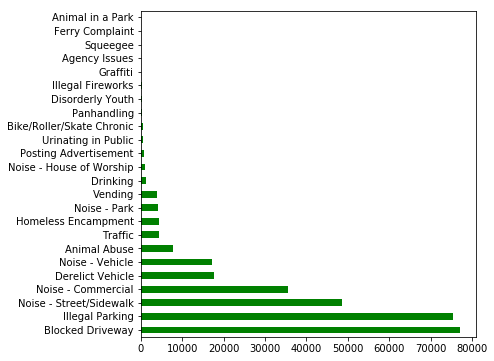

In [34]:
Ordered_CT['Complaint Type'].value_counts().plot(kind = 'barh',
       color = 'green',
       figsize = (6,6))
Ordered_CTG = Ordered_CT.groupby('Location Type')
Ordered_CTG

In [35]:
df[['Complaint Type','Location Type','Request_Closing_Time']].head()

,Complaint Type,Location Type,Request_Closing_Time
0,Noise - Street/Sidewalk,Street/Sidewalk,-1 days +23:04:45
1,Blocked Driveway,Street/Sidewalk,-1 days +22:33:44
2,Blocked Driveway,Street/Sidewalk,-1 days +19:08:29
3,Illegal Parking,Street/Sidewalk,-1 days +16:14:46
4,Illegal Parking,Street/Sidewalk,-1 days +20:32:58
